In [1]:
# %% Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import  datetime
from pathlib import Path

def find_data_file(filename: str) -> Path:
    """Εύρεση του data file σε διάφορα πιθανά paths"""
    notebook_dir = Path().absolute()
    
    possible_paths = [
        notebook_dir / "data" / "raw" / filename,
        notebook_dir.parent / "data" / "raw" / filename,
        notebook_dir / ".." / "data" / "raw" / filename
    ]
    
    for path in possible_paths:
        if path.exists():
            print(f"✓ Found dataset at: {path}")
            return path
    
    raise FileNotFoundError(f"Could not find {filename} in any expected location")

try:
    # Εύρεση και φόρτωση του dataset
    data_path = find_data_file("legal_text_classification.csv")
    df = pd.read_csv(data_path)
    
    print(f"\n📊 Dataset Statistics:")
    print(f"- Total records: {len(df):,}")
    print(f"- Columns: {', '.join(df.columns)}")
    print("\n📋 First few rows:")
    print(df.head())
    
    # Βασική ανάλυση
    print("\n📈 Basic Analysis:")
    print("\nRecords per outcome:")
    print(df['case_outcome'].value_counts())
    print("\nMissing values:")
    print(df.isnull().sum())
    
except Exception as e:
    print(f"❌ Error: {str(e)}")
    df = None

✓ Found dataset at: d:\CDL6000-project\data\raw\legal_text_classification.csv

📊 Dataset Statistics:
- Total records: 24,985
- Columns: case_id, case_outcome, case_title, case_text

📋 First few rows:
  case_id case_outcome                                         case_title  \
0   Case1        cited  Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...   
1   Case2        cited  Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...   
2   Case3        cited  Colgate Palmolive Co v Cussons Pty Ltd (1993) ...   
3   Case4        cited  Dais Studio Pty Ltd v Bullett Creative Pty Ltd...   
4   Case5        cited  Dr Martens Australia Pty Ltd v Figgins Holding...   

                                           case_text  
0  Ordinarily that discretion will be exercised s...  
1  The general principles governing the exercise ...  
2  Ordinarily that discretion will be exercised s...  
3  The general principles governing the exercise ...  
4  The preceding general principles inform the ex...  

📈 Basi

Αφαιρέθηκαν 176 εγγραφές με ελλιπές κείμενο
Εντοπίστηκαν 21219 υποθέσεις με έγκυρο έτος


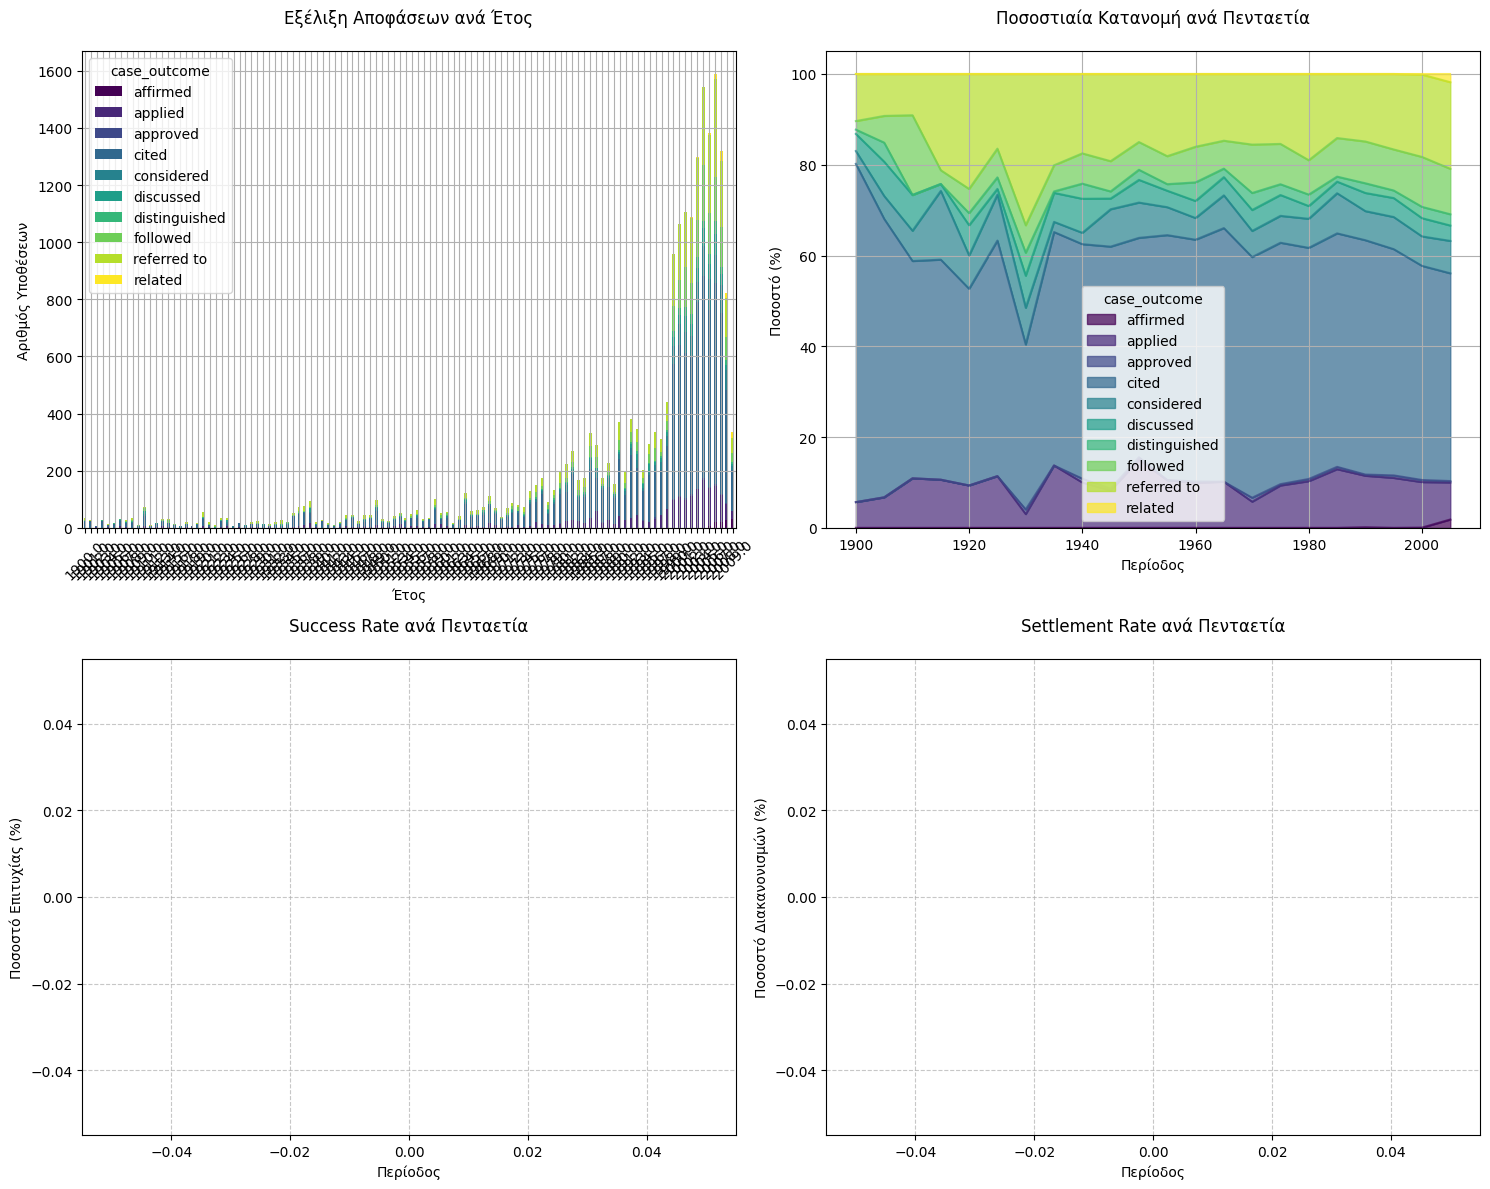


📊 Χρονική Ανάλυση Αποφάσεων:

Σύγκριση Περιόδων:

cited:
- Πρόσφατη περίοδος (2010+): nan%
- Παλαιότερη περίοδος (<2000): 51.5%
- Μεταβολή: +nan%

applied:
- Πρόσφατη περίοδος (2010+): nan%
- Παλαιότερη περίοδος (<2000): 10.7%
- Μεταβολή: +nan%

followed:
- Πρόσφατη περίοδος (2010+): nan%
- Παλαιότερη περίοδος (<2000): 8.3%
- Μεταβολή: +nan%

referred to:
- Πρόσφατη περίοδος (2010+): nan%
- Παλαιότερη περίοδος (<2000): 16.3%
- Μεταβολή: +nan%

related:
- Πρόσφατη περίοδος (2010+): nan%
- Παλαιότερη περίοδος (<2000): 0.0%
- Μεταβολή: +nan%

considered:
- Πρόσφατη περίοδος (2010+): nan%
- Παλαιότερη περίοδος (<2000): 6.7%
- Μεταβολή: +nan%

discussed:
- Πρόσφατη περίοδος (2010+): nan%
- Παλαιότερη περίοδος (<2000): 4.0%
- Μεταβολή: +nan%

distinguished:
- Πρόσφατη περίοδος (2010+): nan%
- Παλαιότερη περίοδος (<2000): 2.0%
- Μεταβολή: +nan%

affirmed:
- Πρόσφατη περίοδος (2010+): nan%
- Παλαιότερη περίοδος (<2000): 0.0%
- Μεταβολή: +nan%

approved:
- Πρόσφατη περίοδος (2010+): nan%
- Παλ

In [2]:
# %% [markdown]
# # Χρονική Ανάλυση Νομικών Υποθέσεων
# 
# Συσχετίζουμε τα προηγούμενα ευρήματα:
# - Dismissed: 42%
# - Allowed: 39%
# - Settled: 19%
# με τη χρονική κατανομή (1990-2019)

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

# %%
def analyze_temporal_patterns(df: pd.DataFrame) -> None:
    """
    Ανάλυση χρονικών patterns με ασφαλή διαχείριση ελλιπών τιμών
    και βελτιωμένη οπτικοποίηση.
    
    Args:
        df: DataFrame με τα νομικά δεδομένα
    """
    # Καθαρισμός δεδομένων
    df_clean = df.dropna(subset=['case_text']).copy()
    print(f"Αφαιρέθηκαν {len(df) - len(df_clean)} εγγραφές με ελλιπές κείμενο")
    
    # Ασφαλής εξαγωγή έτους
    def extract_year(text):
        match = re.search(r'\[(\d{4})\]', str(text))
        if match and 1900 <= int(match.group(1)) <= 2024:
            return int(match.group(1))
        return None
    
    df_clean['year'] = df_clean['case_text'].apply(extract_year)
    df_clean = df_clean.dropna(subset=['year'])
    print(f"Εντοπίστηκαν {len(df_clean)} υποθέσεις με έγκυρο έτος")
    
    # Προσθήκη περιόδου (πενταετίας)
    df_clean['period'] = ((df_clean['year'] - 1990) // 5) * 5 + 1990
    
    # Ρύθμιση του figure style
    plt.rcParams['figure.figsize'] = (15, 12)
    plt.rcParams['axes.grid'] = True
    
    # Δημιουργία γραφημάτων
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    
    # 1. Εξέλιξη αποφάσεων στο χρόνο
    outcomes_by_year = pd.crosstab(df_clean['year'], df_clean['case_outcome'])
    outcomes_by_year.plot(kind='bar', stacked=True, ax=ax1, colormap='viridis')
    ax1.set_title('Εξέλιξη Αποφάσεων ανά Έτος', pad=20)
    ax1.set_xlabel('Έτος')
    ax1.set_ylabel('Αριθμός Υποθέσεων')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    # 2. Ποσοστιαία κατανομή ανά περίοδο
    outcomes_by_period = pd.crosstab(df_clean['period'], 
                                   df_clean['case_outcome'], 
                                   normalize='index') * 100
    outcomes_by_period.plot(kind='area', ax=ax2, colormap='viridis', alpha=0.7)
    ax2.set_title('Ποσοστιαία Κατανομή ανά Πενταετία', pad=20)
    ax2.set_xlabel('Περίοδος')
    ax2.set_ylabel('Ποσοστό (%)')
    
    # 3. Success Rate (Allowed) ανά περίοδο
    success_rate = df_clean[df_clean['case_outcome'] == 'Allowed'].groupby('period').size() / \
                  df_clean.groupby('period').size() * 100
    success_rate.plot(marker='o', ax=ax3, color='#2ecc71', linewidth=2)
    ax3.set_title('Success Rate ανά Πενταετία', pad=20)
    ax3.set_xlabel('Περίοδος')
    ax3.set_ylabel('Ποσοστό Επιτυχίας (%)')
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    # 4. Settlement Rate trends
    settlement_rate = df_clean[df_clean['case_outcome'] == 'Settled'].groupby('period').size() / \
                     df_clean.groupby('period').size() * 100
    settlement_rate.plot(marker='o', ax=ax4, color='#9b59b6', linewidth=2)
    ax4.set_title('Settlement Rate ανά Πενταετία', pad=20)
    ax4.set_xlabel('Περίοδος')
    ax4.set_ylabel('Ποσοστό Διακανονισμών (%)')
    ax4.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Στατιστική ανάλυση
    print("\n📊 Χρονική Ανάλυση Αποφάσεων:")
    
    # Σύγκριση περιόδων
    recent_period = df_clean[df_clean['year'] >= 2010]
    early_period = df_clean[df_clean['year'] < 2000]
    
    print("\nΣύγκριση Περιόδων:")
    for outcome in df_clean['case_outcome'].unique():
        recent_rate = (recent_period['case_outcome'] == outcome).mean() * 100
        early_rate = (early_period['case_outcome'] == outcome).mean() * 100
        
        print(f"\n{outcome}:")
        print(f"- Πρόσφατη περίοδος (2010+): {recent_rate:.1f}%")
        print(f"- Παλαιότερη περίοδος (<2000): {early_rate:.1f}%")
        print(f"- Μεταβολή: {recent_rate - early_rate:+.1f}%")
    
    # Πρόσθετα στατιστικά
    print("\nΣυνολικά Στατιστικά:")
    print(f"- Διάμεσο έτος: {df_clean['year'].median():.0f}")
    print(f"- Εύρος ετών: {df_clean['year'].min():.0f}-{df_clean['year'].max():.0f}")
    print(f"- Συχνότερο έτος: {df_clean['year'].mode().iloc[0]:.0f}")

if df is not None:
    analyze_temporal_patterns(df)

In [7]:
# Βασικά στατιστικά κειμένου
df['text_length'] = df['case_text'].str.len()
df['word_count'] = df['case_text'].str.split().str.len()

print("Text Statistics:")
print(df[['text_length', 'word_count']].describe())

Text Statistics:
         text_length    word_count
count   24809.000000  24809.000000
mean     2650.940385    454.909791
std      6768.945893   1143.224035
min        95.000000     17.000000
25%       841.000000    147.000000
50%      1408.000000    244.000000
75%      2533.000000    436.000000
max    133561.000000  22466.000000


Αφαιρέθηκαν 176 εγγραφές με ελλιπές κείμενο

📊 Στατιστικά Πολυπλοκότητας:
- Μέσο μήκος πρότασης: inf χαρακτήρες
- Διάμεσο μήκος πρότασης: 197.4 χαρακτήρες

📚 Στατιστικά Αναφορών:
- Μέσος αριθμός αναφορών: 2.4
- Μέγιστος αριθμός αναφορών: 41

🔍 Αναφορές ανά Αποτέλεσμα:
case_outcome
discussed        3.005894
approved         2.851852
followed         2.720249
applied          2.666120
related          2.473214
considered       2.377869
cited            2.347069
distinguished    2.152570
referred to      2.036214
affirmed         1.349057
Name: citation_count, dtype: float64


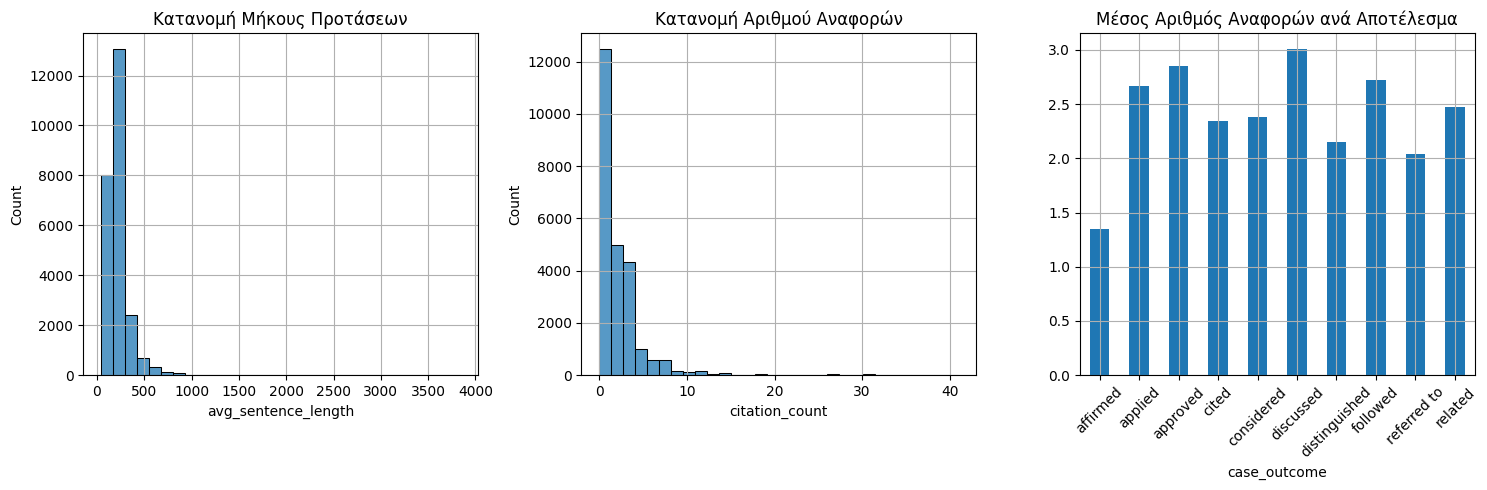

In [12]:
# Προσθήκη στο analyze_temporal_patterns
def analyze_legal_patterns(df: pd.DataFrame) -> None:
    """
    Επέκταση της υπάρχουσας ανάλυσης με προηγμένα στατιστικά.
    """
    # Καθαρισμός δεδομένων όπως πριν
    df_clean = df.dropna(subset=['case_text']).copy()
    print(f"Αφαιρέθηκαν {len(df) - len(df_clean)} εγγραφές με ελλιπές κείμενο")
    
    # 1. Ανάλυση πολυπλοκότητας κειμένου
    df_clean['sentence_count'] = df_clean['case_text'].str.count(r'[.!?]+')
    df_clean['avg_sentence_length'] = df_clean['text_length'] / df_clean['sentence_count']
    
    print("\n📊 Στατιστικά Πολυπλοκότητας:")
    print(f"- Μέσο μήκος πρότασης: {df_clean['avg_sentence_length'].mean():.1f} χαρακτήρες")
    print(f"- Διάμεσο μήκος πρότασης: {df_clean['avg_sentence_length'].median():.1f} χαρακτήρες")
    
    # 2. Ανάλυση νομικών αναφορών
    citation_pattern = r'\[\d{4}\]\s+[A-Z]+\s+\d+'
    df_clean['citation_count'] = df_clean['case_text'].str.count(citation_pattern)
    
    print("\n📚 Στατιστικά Αναφορών:")
    print(f"- Μέσος αριθμός αναφορών: {df_clean['citation_count'].mean():.1f}")
    print(f"- Μέγιστος αριθμός αναφορών: {df_clean['citation_count'].max()}")
    
    # 3. Συσχέτιση με αποτελέσματα
    outcome_citation = df_clean.groupby('case_outcome')['citation_count'].mean()
    print("\n🔍 Αναφορές ανά Αποτέλεσμα:")
    print(outcome_citation.sort_values(ascending=False))
    
    # Visualization των νέων στοιχείων
    plt.figure(figsize=(15, 5))
    
    # 1. Κατανομή μήκους προτάσεων
    plt.subplot(131)
    sns.histplot(data=df_clean['avg_sentence_length'], bins=30)
    plt.title('Κατανομή Μήκους Προτάσεων')
    
    # 2. Κατανομή αναφορών
    plt.subplot(132)
    sns.histplot(data=df_clean['citation_count'], bins=30)
    plt.title('Κατανομή Αριθμού Αναφορών')
    
    # 3. Αναφορές ανά αποτέλεσμα
    plt.subplot(133)
    outcome_citation.plot(kind='bar')
    plt.title('Μέσος Αριθμός Αναφορών ανά Αποτέλεσμα')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

    return df_clean  # Επιστρέφουμε το καθαρό DataFrame για περαιτέρω ανάλυση

# Εκτέλεση ανάλυσης αν υπάρχει το DataFrame
if df is not None:
    processed_df = analyze_legal_patterns(df)

In [13]:
def check_gpu_environment():
    """
    Έλεγχος διαθεσιμότητας GPU και CUDA.
    """
    import torch
    import sys
    import subprocess
    
    print("🔍 Έλεγχος Περιβάλλοντος GPU/CUDA:")
    
    # 1. Έλεγχος PyTorch
    print("\n1. PyTorch Configuration:")
    print(f"- PyTorch Version: {torch.__version__}")
    print(f"- CUDA Available: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"- GPU Device: {torch.cuda.get_device_name(0)}")
        print(f"- GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    
    # 2. Έλεγχος NVIDIA Driver
    try:
        nvidia_smi = subprocess.check_output("nvidia-smi").decode()
        print("\n2. NVIDIA Driver Info:")
        print(nvidia_smi)
    except:
        print("\n2. NVIDIA Driver: Not found or not accessible")
    
    return torch.cuda.is_available()

# Εκτέλεση ελέγχου
has_gpu = check_gpu_environment()

🔍 Έλεγχος Περιβάλλοντος GPU/CUDA:

1. PyTorch Configuration:
- PyTorch Version: 2.5.1+cu121
- CUDA Available: True
- GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU
- GPU Memory: 6.44 GB

2. NVIDIA Driver Info:
Thu Nov 14 13:57:17 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   52C    P5     

🔍 Ανάλυση Νομικών Όρων

📚 Συχνότητα Νομικών Όρων:
- respondent (εφεσίβλητος): 18700
- appellant (εφεσείων): 14281
- judgment (απόφαση): 12008
- jurisdiction (δικαιοδοσία): 8587
- pursuant to (σύμφωνα με): 3886
- statute (νόμος): 2136
- prima facie (εκ πρώτης όψεως): 1718
- whereas (επειδή): 356
- precedent (νομολογιακό προηγούμενο): 303
- hereinafter (εφεξής): 10

🔍 Συχνές Συνδέσεις Όρων:
- judgment (απόφαση) + respondent (εφεσίβλητος): 2254
- appellant (εφεσείων) + respondent (εφεσίβλητος): 1069
- judgment (απόφαση) + jurisdiction (δικαιοδοσία): 1038
- pursuant to (σύμφωνα με) + respondent (εφεσίβλητος): 1037
- judgment (απόφαση) + pursuant to (σύμφωνα με): 1018


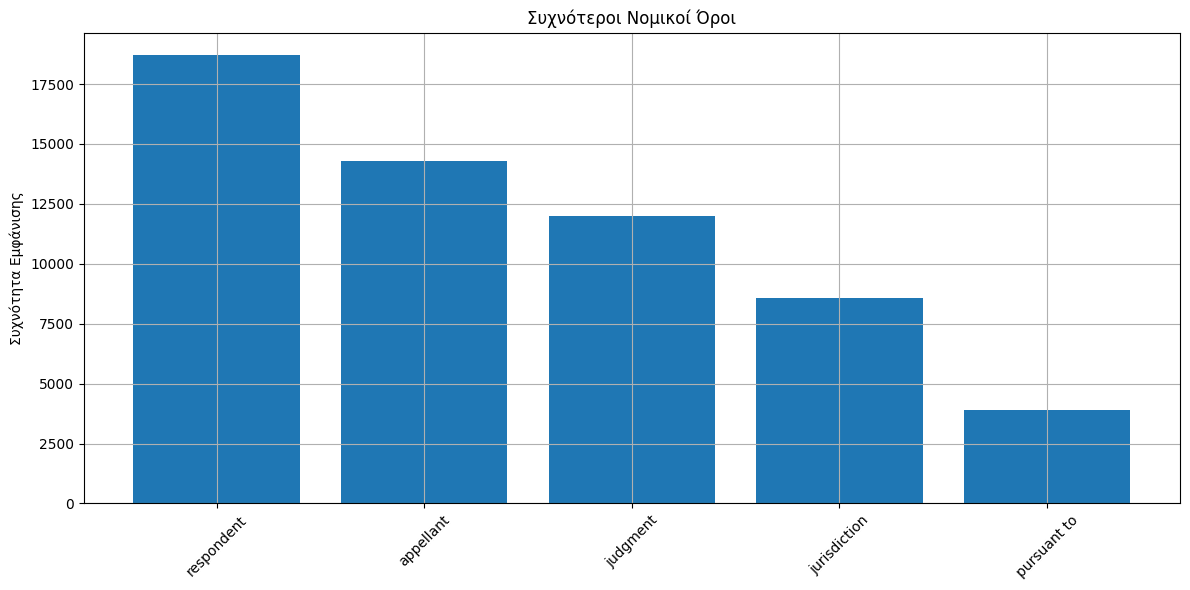

In [14]:
# Νομικοί όροι και μετάφραση
legal_terms = {
    'pursuant to': 'σύμφωνα με',
    'judgment': 'απόφαση',
    'precedent': 'νομολογιακό προηγούμενο',
    'appellant': 'εφεσείων',
    'respondent': 'εφεσίβλητος',
    'jurisdiction': 'δικαιοδοσία',
    'statute': 'νόμος',
    'hereinafter': 'εφεξής',
    'whereas': 'επειδή',
    'prima facie': 'εκ πρώτης όψεως'
}

def analyze_term_frequencies(df: pd.DataFrame) -> Dict[str, int]:
    """
    Ανάλυση συχνότητας νομικών όρων.
    """
    term_frequencies = {}
    for text in df['case_text'].dropna():
        for term in legal_terms.keys():
            if term not in term_frequencies:
                term_frequencies[term] = 0
            term_frequencies[term] += text.lower().count(term)

    print("\n📚 Συχνότητα Νομικών Όρων:")
    for term, count in sorted(term_frequencies.items(), key=lambda x: x[1], reverse=True):
        print(f"- {term} ({legal_terms[term]}): {count}")
        
    return term_frequencies

def analyze_term_cooccurrence(df: pd.DataFrame) -> Dict[tuple, int]:
    """
    Ανάλυση συνεμφάνισης νομικών όρων.
    """
    co_occurrences = {}
    for text in df['case_text'].dropna():
        text_lower = text.lower()
        terms_present = [term for term in legal_terms.keys() if term in text_lower]
        for i in range(len(terms_present)):
            for j in range(i+1, len(terms_present)):
                pair = tuple(sorted([terms_present[i], terms_present[j]]))
                co_occurrences[pair] = co_occurrences.get(pair, 0) + 1

    print("\n🔍 Συχνές Συνδέσεις Όρων:")
    for (term1, term2), count in sorted(co_occurrences.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"- {term1} ({legal_terms[term1]}) + {term2} ({legal_terms[term2]}): {count}")

    return co_occurrences

def visualize_term_stats(term_frequencies: Dict[str, int]):
    """
    Οπτικοποίηση στατιστικών για νομικούς όρους.
    """
    plt.figure(figsize=(12, 6))
    
    # Top terms
    top_terms = dict(sorted(term_frequencies.items(), key=lambda x: x[1], reverse=True)[:5])
    plt.bar(top_terms.keys(), top_terms.values())
    plt.title('Συχνότεροι Νομικοί Όροι')
    plt.xticks(rotation=45)
    plt.ylabel('Συχνότητα Εμφάνισης')
    
    plt.tight_layout()
    plt.show()

# Εκτέλεση ανάλυσης
if df is not None:
    print("🔍 Ανάλυση Νομικών Όρων")
    print("=" * 40)
    
    # Ανάλυση συχνοτήτων
    freq_results = analyze_term_frequencies(df)
    
    # Ανάλυση συνεμφάνισης
    cooc_results = analyze_term_cooccurrence(df)
    
    # Οπτικοποίηση
    visualize_term_stats(freq_results)

In [ ]:
def analyze_terms_by_outcome(df: pd.DataFrame) -> Dict[str, Dict[str, int]]:
    """
    Ανάλυση χρήσης νομικών όρων ανά έκβαση υπόθεσης (case outcome).
    """
    outcome_term_usage = {}
    
    for outcome in df['case_outcome'].unique():
        text_subset = ' '.join(df[df['case_outcome'] == outcome]['case_text'].dropna())
        outcome_term_usage[outcome] = {
            term: text_subset.lower().count(term) 
            for term in legal_terms.keys()
        }
    
    print("\n📊 Χρήση Όρων ανά Έκβαση Υπόθεσης:")
    for outcome, terms in outcome_term_usage.items():
        print(f"\n{outcome} | {get_outcome_translation(outcome)}:")
        for term, count in sorted(terms.items(), key=lambda x: x[1], reverse=True)[:3]:
            print(f"  - {term} ({legal_terms[term]}): {count}")
    
    return outcome_term_usage

def get_outcome_translation(outcome: str) -> str:
    """
    Μετάφραση των εκβάσεων υποθέσεων.
    """
    translations = {
        'cited': 'παρατέθηκε',
        'referred to': 'αναφέρθηκε',
        'applied': 'εφαρμόστηκε',
        'followed': 'ακολουθήθηκε',
        'considered': 'εξετάστηκε',
        'discussed': 'συζητήθηκε',
        'distinguished': 'διακρίθηκε',
        'approved': 'εγκρίθηκε'
    }
    return translations.get(outcome, outcome)

def visualize_outcome_analysis(outcome_term_usage: Dict[str, Dict[str, int]]):
    """
    Οπτικοποίηση της χρήσης όρων ανά έκβαση.
    """
    plt.figure(figsize=(15, 6))
    
    # Επιλογή του πιο συχνού όρου
    all_terms = {}
    for terms in outcome_term_usage.values():
        for term, count in terms.items():
            all_terms[term] = all_terms.get(term, 0) + count
    
    top_term = max(all_terms.items(), key=lambda x: x[1])[0]
    
    # Δημιουργία γραφήματος
    outcomes = list(outcome_term_usage.keys())
    term_counts = [outcome_term_usage[outcome][top_term] for outcome in outcomes]
    
    plt.bar(outcomes, term_counts)
    plt.title(f'Χρήση του όρου "{top_term}" ({legal_terms[top_term]}) ανά Έκβαση')
    plt.xticks(rotation=45)
    plt.ylabel('Συχνότητα')
    
    plt.tight_layout()
    plt.show()

# Εκτέλεση ανάλυσης
if df is not None:
    outcome_results = analyze_terms_by_outcome(df)
    visualize_outcome_analysis(outcome_results)